<a href="https://colab.research.google.com/github/byhqsr/Indonesia-AI/blob/main/Interm_Python_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [77]:
airbnb = pd.read_csv('airbnb.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [78]:
airbnb.shape

(48895, 16)

In [79]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [80]:
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [51]:
airbnb.drop(['id','name','host_id','host_name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','calculated_host_listings_count'],axis=1,inplace=True)
airbnb.head()

,price,last_review,reviews_per_month,availability_365
0,149,2018-10-19,0.21,365
1,225,2019-05-21,0.38,355
2,150,NaN,NaN,365
3,89,2019-07-05,4.64,194
4,80,2018-11-19,0.10,0


In [52]:
airbnb.isnull().sum()

price                    0
last_review          10052
reviews_per_month    10052
availability_365         0
dtype: int64

In [53]:
airbnb['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [54]:
airbnb['last_review'].describe()

count          38843
unique          1764
top       2019-06-23
freq            1413
Name: last_review, dtype: object

In [55]:
airbnb['reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [56]:
airbnb['reviews_per_month'].fillna(value=airbnb['reviews_per_month'].mean(), inplace=True)

In [57]:
airbnb.isnull().sum()

price                    0
last_review          10052
reviews_per_month        0
availability_365         0
dtype: int64

In [58]:
airbnb['last_review'].fillna(value=airbnb['last_review'].value_counts().index[0], inplace=True)

In [59]:
airbnb.isnull().sum()

price                0
last_review          0
reviews_per_month    0
availability_365     0
dtype: int64

In [60]:
airbnb['last_review']>'2019'

0        False
1         True
2         True
3         True
4        False
         ...  
48890     True
48891     True
48892     True
48893     True
48894     True
Name: last_review, Length: 48895, dtype: bool

In [61]:
airbnb

,price,last_review,reviews_per_month,availability_365
0,149,2018-10-19,0.210000,365
1,225,2019-05-21,0.380000,355
2,150,2019-06-23,1.373221,365
3,89,2019-07-05,4.640000,194
4,80,2018-11-19,0.100000,0
...,...,...,...,...
48890,70,2019-06-23,1.373221,9
48891,40,2019-06-23,1.373221,36
48892,115,2019-06-23,1.373221,27
48893,55,2019-06-23,1.373221,2


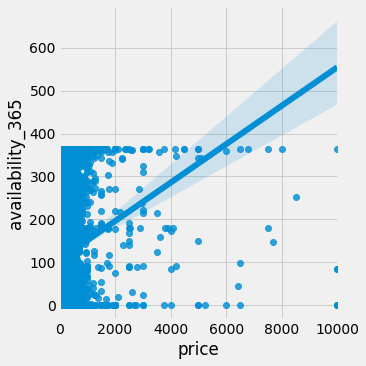

In [81]:
sns.lmplot(x='price', y='availability_365', data=airbnb)